In [1]:
import pandas as pd #reading dataset
import matplotlib as mpl    #plotting, visualization
import matplotlib.pyplot as plt
import tensorflow as tf #building model
from tensorflow.keras.models import Model
import numpy as np  #playing output with model
from sklearn.model_selection import train_test_split    #model selection and scaling data
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

import sys
sys.path.append('../../')   # Add parent directory to Python path
from utils.Plots import *
RANDOM_SEED = 42


In [2]:
df = pd.read_csv('../../data/handlebar/Accelerometer_data_combined_segmented.csv') 
# df.drop('Unnamed: 0', axis=1, inplace=True)
df

,curb_scene,start_time,end_time,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,...,Acc-Z_91,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100
0,0.0,2024-07-24 10:26:02.003,2024-07-24 10:26:02.499,8.805878,8.796295,8.757996,8.781937,8.805878,8.796295,8.781937,...,8.757996,8.757996,8.762772,8.757996,8.762772,8.767563,8.738831,8.757996,8.743622,8.772354
1,0.0,2024-07-24 10:26:02.503,2024-07-24 10:26:02.995,8.767563,8.748413,8.753204,8.767563,8.777145,8.781937,8.748413,...,8.777145,8.767563,8.796295,8.810669,8.781937,8.781937,8.757996,8.801086,8.762772,8.757996
2,0.0,2024-07-24 10:26:03.002,2024-07-24 10:26:03.497,8.767563,8.767563,8.772354,8.757996,8.786728,8.777145,8.781937,...,8.777145,8.753204,8.777145,8.767563,8.762772,8.786728,8.734055,8.786728,8.753204,8.786728
3,0.0,2024-07-24 10:26:03.502,2024-07-24 10:26:03.999,8.748413,8.777145,8.767563,8.757996,8.757996,8.757996,8.767563,...,8.762772,8.767563,8.772354,8.801086,8.796295,8.791504,8.781937,8.796295,8.781937,8.781937
4,0.0,2024-07-24 10:26:04.004,2024-07-24 10:26:04.497,8.753204,8.767563,8.748413,8.767563,8.767563,8.772354,8.772354,...,8.786728,8.762772,8.762772,8.767563,8.743622,8.729263,8.743622,8.777145,8.781937,8.791504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4422,1.0,2024-07-24 11:07:59.132,2024-07-24 11:07:59.497,-9.054871,-9.054871,-17.180786,-21.806396,-20.963638,-3.620026,-12.349289,...,-6.770798,-6.770798,-6.770798,-6.770798,-6.770798,-6.770798,-6.770798,-6.770798,-6.770798,-6.770798
4423,1.0,2024-07-24 11:08:33.627,2024-07-24 11:08:33.995,-22.697037,-22.697037,-24.578873,-24.578873,-23.151932,-11.784256,6.440399,...,21.610062,21.610062,21.610062,21.610062,21.610062,21.610062,21.610062,21.610062,21.610062,21.610062
4424,1.0,2024-07-24 11:08:51.500,2024-07-24 11:08:51.932,19.646820,18.617310,15.653290,14.911087,28.629868,33.657684,32.556350,...,15.849609,8.700531,10.860092,10.860092,11.185715,11.616669,11.616669,11.616669,11.616669,11.616669
4425,1.0,2024-07-24 11:09:36.075,2024-07-24 11:09:36.497,13.508087,13.508087,13.177689,17.094604,18.507187,18.507187,20.657180,...,5.645523,5.645523,5.645523,5.645523,5.645523,5.645523,5.645523,5.645523,5.645523,5.645523


In [3]:
# Suppose df is your DataFrame, and df['curb_scene'] is your label column
train_data, test_data, train_labels, test_labels = train_test_split(df, df['curb_scene'], 
                                                                    test_size=0.2, 
                                                                    random_state=RANDOM_SEED)

# Now split the (train_data, train_labels) again into train and validation
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, 
                                                                  test_size=0.25, 
                                                                  random_state=RANDOM_SEED)


In [4]:
#scaling data, because neural network works better with scaled data
scaler = StandardScaler()
data_scaled = scaler.fit(train_data.iloc[:, 3:])
#transform data
train_data_scaled = scaler.transform(train_data.iloc[:, 3:])
val_data_scaled = scaler.transform(val_data.iloc[:, 3:])
test_data_scaled = scaler.transform(test_data.iloc[:, 3:])


In [5]:
# Convert the scaled data back to DataFrames for further processing
train_data_scaled_df = pd.DataFrame(train_data_scaled, columns=train_data.columns[3:])
test_data_scaled_df = pd.DataFrame(test_data_scaled, columns=test_data.columns[3:])
val_data_scaled_df = pd.DataFrame(val_data_scaled, columns=val_data.columns[3:])
# Add the 'curb_scene', 'start_time', and 'end_time' columns back to the scaled DataFrames
train_data_scaled_df['curb_scene'] = train_data['curb_scene'].values
train_data_scaled_df['start_time'] = train_data['start_time'].values
train_data_scaled_df['end_time'] = train_data['end_time'].values
test_data_scaled_df['curb_scene'] = test_data['curb_scene'].values
test_data_scaled_df['start_time'] = test_data['start_time'].values
test_data_scaled_df['end_time'] = test_data['end_time'].values
val_data_scaled_df['curb_scene'] = val_data['curb_scene'].values
val_data_scaled_df['start_time'] = val_data['start_time'].values
val_data_scaled_df['end_time'] = val_data['end_time'].values

In [6]:
# Filter and slice the data
normal_train_data_scaled = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 0.0].values[:, :-3]
abnormal_train_data_scaled = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 1.0].values[:, :-3]
normal_val_data_scaled = val_data_scaled_df[val_data_scaled_df['curb_scene'] == 0.0].values[:, :-3]
abnormal_val_data_scaled = val_data_scaled_df[val_data_scaled_df['curb_scene'] == 1.0].values[:, :-3]
val_data_scaled = val_data_scaled_df.values[:, :-3]
normal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 0.0].values[:, :-3]
abnormal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 1.0].values[:, :-3]

In [7]:
# Cast to float32
normal_train_data_scaled = normal_train_data_scaled.astype("float32")
abnormal_train_data_scaled = abnormal_train_data_scaled.astype("float32")
normal_val_data_scaled = normal_val_data_scaled.astype("float32")
abnormal_val_data_scaled = abnormal_val_data_scaled.astype("float32")
val_data_scaled = val_data_scaled.astype("float32")
normal_test_data_scaled = normal_test_data_scaled.astype("float32")
abnormal_test_data_scaled = abnormal_test_data_scaled.astype("float32")

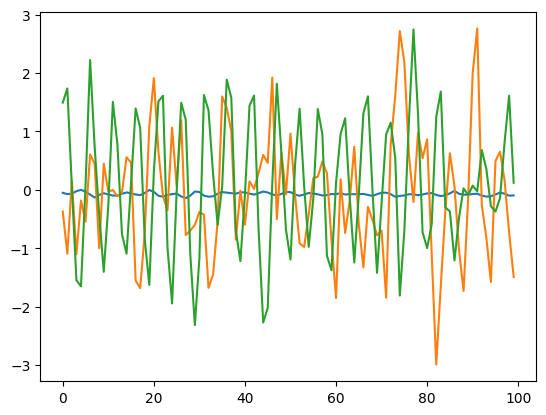

In [8]:
#See normal data ecg
plt.plot(normal_train_data_scaled[0])
plt.plot(normal_train_data_scaled[500])
plt.plot(normal_train_data_scaled[600])

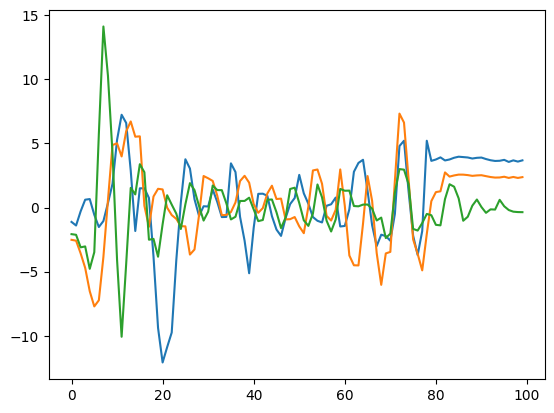

In [9]:
# #see abnormal data
plt.plot(abnormal_train_data_scaled[10])
plt.plot(abnormal_train_data_scaled[20])
plt.plot(abnormal_train_data_scaled[30])


In [10]:
#Allow me to use data in different ways
class AutoEncoder(Model):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation='tanh'),
            tf.keras.layers.Dense(32, activation='tanh'),
            tf.keras.layers.Dense(16, activation='tanh'),
        ])
        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Dense(32, activation='tanh'),
            tf.keras.layers.Dense(64, activation='tanh'),
            tf.keras.layers.Dense(100, activation='tanh')
        ])
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        #returns me a decoder object
        return decoded

In [11]:
#define model
model = AutoEncoder()
#if in 2 Epochs, loss is not decreasing, stop the training
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode='min')
model.compile(optimizer='adam', loss='mse')

In [12]:
# seprate class as well for normal and abnormal data invalidation data
history = model.fit(normal_train_data_scaled, normal_train_data_scaled,epochs=100, batch_size=128,
                    validation_data=(val_data_scaled, val_data_scaled), 
                    shuffle=True, callbacks=[early_stopping])

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.7126 - val_loss: 0.9088
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6236 - val_loss: 0.8384
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5654 - val_loss: 0.8027
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5165 - val_loss: 0.7799
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5034 - val_loss: 0.7620
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4895 - val_loss: 0.7487
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4862 - val_loss: 0.7370
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4572 - val_loss: 0.7278
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4672 - val_loss: 0.7191
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4341 - val_loss: 0.7121
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4336 - val_loss: 0.7052
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

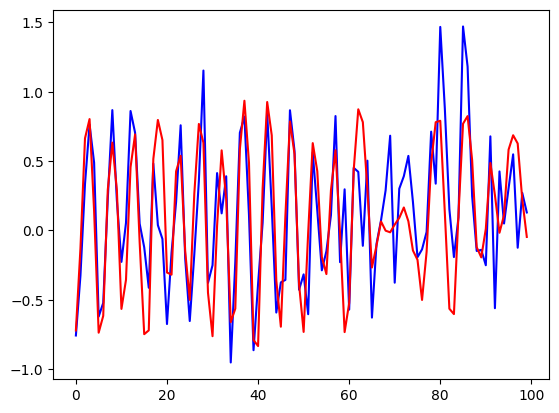

In [13]:
#normal data
#Encoder is bottleneck of 8 Units, decoder is reconstructed output of 100 units
encoder_out = model.encoder(normal_test_data_scaled).numpy()
decoder_out = model.decoder(encoder_out).numpy()
plt.plot(normal_test_data_scaled[0], 'blue')
plt.plot(decoder_out[0], 'red')

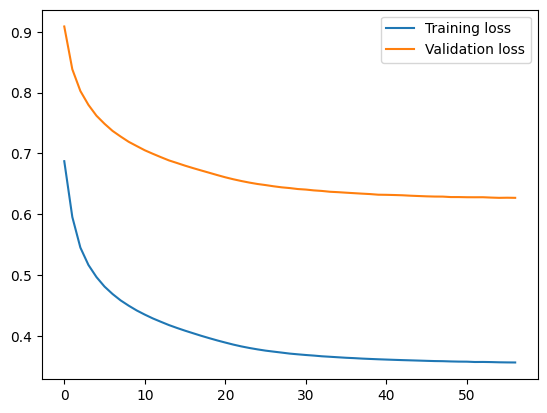

In [26]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

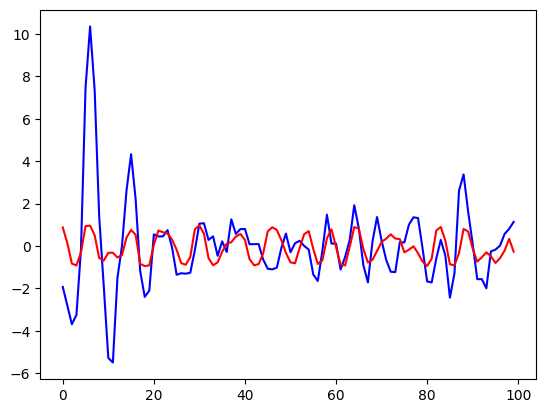

In [14]:
# abnormal data
encoder_out_abnormal = model.encoder(abnormal_test_data_scaled).numpy()
decoder_out_abnormal = model.decoder(encoder_out_abnormal).numpy()
plt.plot(abnormal_test_data_scaled[2], 'blue')
plt.plot(decoder_out_abnormal[2], 'red')

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


(array([290.,  43., 104.,  97.,  66.,  63.,  51.,  32.,  26.,  14.,  12.,
          7.,  11.,  10.,   6.,   9.,   3.,   7.,   3.,   1.,   1.,   2.,
          2.,   2.,   1.,   2.,   1.,   0.,   1.,   1.,   1.,   0.,   0.,
          0.,   0.,   1.,   0.,   1.,   0.,   0.,   2.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   1.]),
 array([4.19411634e-04, 8.62594321e-02, 1.72099456e-01, 2.57939488e-01,
        3.43779504e-01, 4.29619521e-01, 5.15459597e-01, 6.01299584e-01,
        6.87139630e-01, 7.72979677e-01, 8.58819664e-01, 9.44659710e-01,
        1.03049970e+00, 1.11633968e+00, 1.20217967e+00, 1.28801978e+00,
        1.37385976e+00, 1.45969975e+00, 1.54553986e+00, 1.63137984e+00,
        1.71721983e+00, 1.80305994e+00, 1.88889992e+00, 1.97473991e+00,
        2.06058002e+00, 2.14642000e+00, 2.23225999e+00, 2.31809998e+00,
        2.40393996e+00, 2.48978019e+00, 2.57562017e+00, 2.66146016e+00,
        2.74730015e+00, 2.83314013e+00, 2.91898012e+00, 3.00482011e+00,
        3.

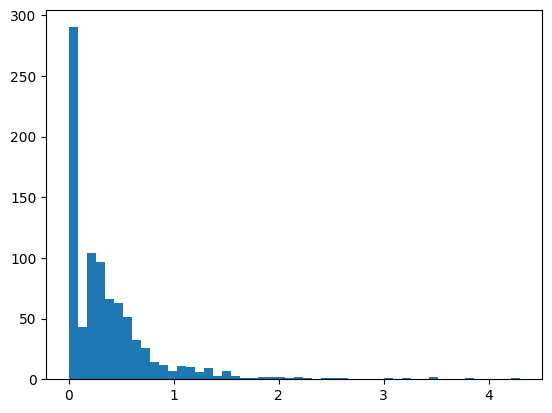

In [15]:
reconstruction_normal = model.predict(normal_test_data_scaled)    #output error between input and output
train_loss = tf.keras.losses.mse(reconstruction_normal, normal_test_data_scaled)
plt.hist(train_loss, bins=50)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


(array([1., 0., 0., 0., 0., 3., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.]),
 array([ 3.68836355,  4.07135773,  4.45435238,  4.83734655,  5.22034073,
         5.6033349 ,  5.98632908,  6.36932373,  6.75231791,  7.13531208,
         7.51830673,  7.90130091,  8.28429508,  8.66728973,  9.05028343,
         9.43327808,  9.81627274, 10.19926643, 10.58226013, 10.96525574,
        11.34824944, 11.73124313, 12.11423874, 12.49723244, 12.88022614,
        13.26322174, 13.64621544, 14.02920914, 14.41220474, 14.79519844,
        15.17819214, 15.56118584, 15.94418144, 16.32717514, 16.71016884,
        17.09316444, 17.47615814, 17.85915184, 18.24214745, 18.62514114,
        19.00813484, 19.39113045, 19.77412415, 20.15711784, 20.54011345,
        20.92310715, 21.30610085, 21.68909645, 22.07209015, 22.45508385,
        22.83807945]),
 <BarContainer object

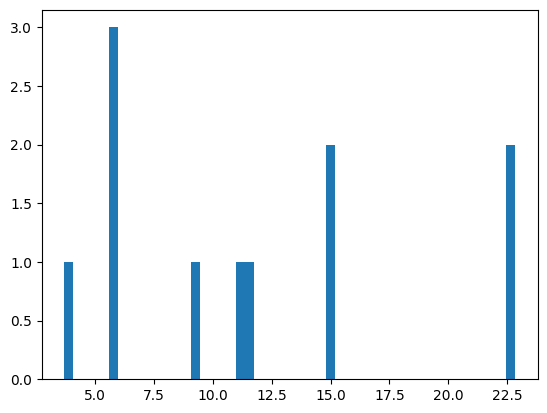

In [16]:
reconstruction_abnormal = model.predict(abnormal_test_data_scaled)
train_loss_abnormal = tf.keras.losses.mse(reconstruction_abnormal, abnormal_test_data_scaled)
plt.hist(train_loss_abnormal, bins=50)

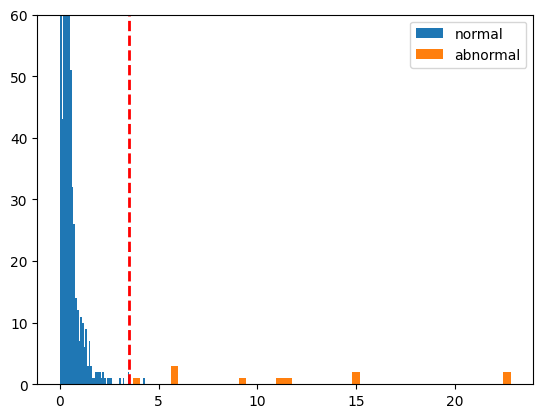

In [21]:
threshold = 3.5
plt.hist(train_loss, bins=50, label='normal')
plt.hist(train_loss_abnormal, bins=50, label='abnormal')
plt.ylim(0, 60)
plt.legend()
plt.axvline(threshold, color='r', linestyle='dashed', linewidth=2,label = '{:0.3f}'.format(threshold))
plt.show()

In [22]:
preds=tf.math.less(train_loss, threshold)
correct = tf.math.count_nonzero(preds)
print("Correct Predictions: ", correct.numpy())
print("Accuracy: ", correct.numpy()/len(preds))

Correct Predictions:  873
Accuracy:  0.9977142857142857


In [23]:
preds_abnormal=tf.math.greater(train_loss_abnormal, threshold)
correct = tf.math.count_nonzero(preds_abnormal)
print("Correct Predictions: ", correct.numpy())
print("Accuracy: ", correct.numpy()/len(preds_abnormal))

Correct Predictions:  11
Accuracy:  1.0


In [24]:
# 1. Combine the three DataFrames into one
combined_df = pd.concat([
    train_data_scaled_df,
    test_data_scaled_df,
    val_data_scaled_df
], ignore_index=True)

# 2. Convert 'start_time' to datetime if it's not already
combined_df['start_time'] = pd.to_datetime(combined_df['start_time'])

# 3. Sort by the 'start_time' column
combined_df.sort_values('start_time', inplace=True)

# 4. Set 'start_time' as the index
combined_df.set_index('start_time', inplace=True)

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step


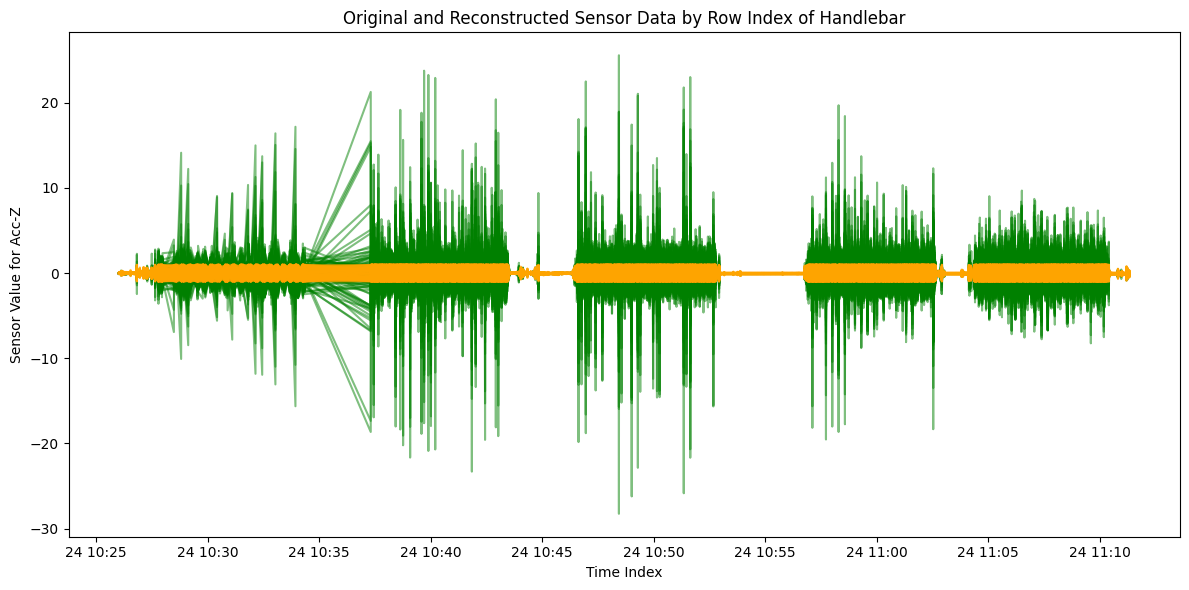

In [25]:
# reconstruct data using autoencoder

import matplotlib.pyplot as plt
import numpy as np

# Assuming you have your autoencoder model and combined_df ready

# 1. Select columns to plot (e.g., "Acc-Z_1" to "Acc-Z_100")
sensor_cols = [col for col in combined_df.columns if col.startswith("Acc-Z_")]

# 2. Extract the sensor data from combined_df
sensor_data = combined_df[sensor_cols].values

# 3. Reconstruct the data using the autoencoder
reconstructed_data = model.predict(sensor_data)

# 4. Plot the original and reconstructed data points
plt.figure(figsize=(12, 6))

# Use a single color for all lines
color_original = 'green'
color_reconstructed = 'orange'

# Plot original data
for i, col in enumerate(sensor_cols):
    plt.plot(combined_df.index, sensor_data[:, i], color=color_original, alpha=0.5)

# Plot reconstructed data
for i, col in enumerate(sensor_cols):
    plt.plot(combined_df.index, reconstructed_data[:, i], color=color_reconstructed, alpha=0.5)

plt.title("Original and Reconstructed Sensor Data by Row Index of Handlebar")
plt.xlabel("Time Index")
plt.ylabel("Sensor Value for Acc-Z")
plt.tight_layout()
plt.show()